In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
ins_df=pd.read_csv('insurance.csv')
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# statistical analysis
ins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
# null values
ins_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# copy of a file
df=ins_df.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


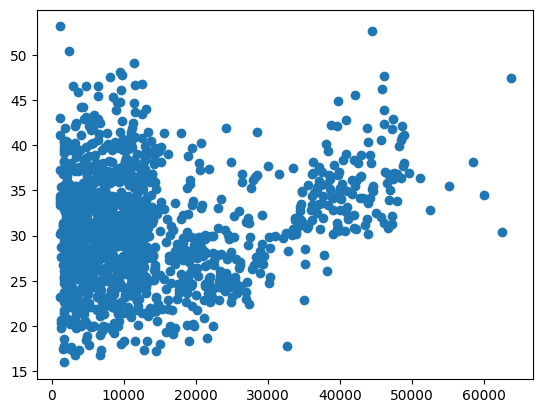

In [ ]:
# comparision of bmi vs charges
plt.scatter(df['charges'],df['bmi'])

<Axes: xlabel='age', ylabel='charges'>

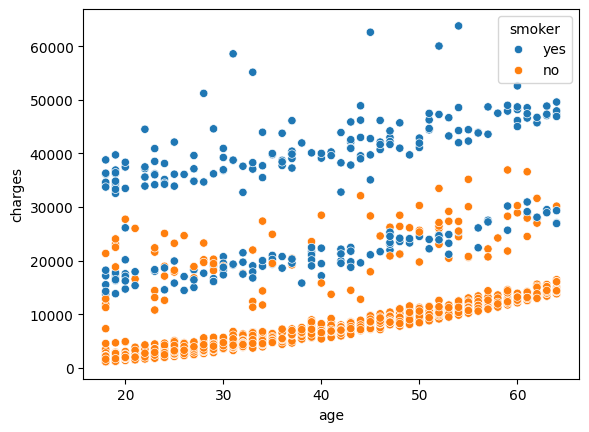

In [ ]:
sns.scatterplot(x='age',y='charges',hue='smoker',data=df)

It is very clear that Smokers are charged more compared to non-smokers

In [ ]:
df['bmi_category']=pd.cut(df['bmi'],bins=[0,18.5, 24.9,29.9,50],
                          labels=['Underweight','Normal','Overweight','Obese'])
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


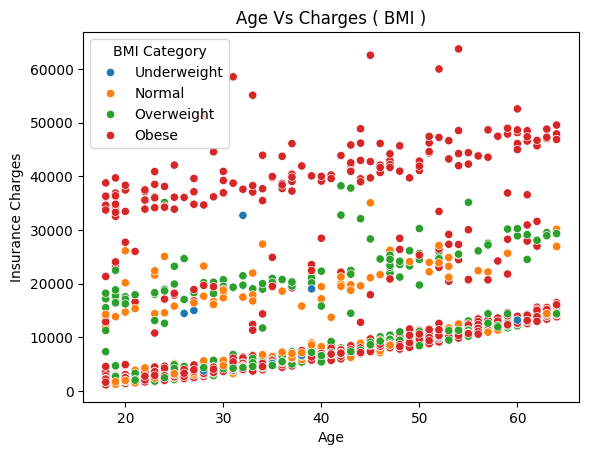

In [ ]:
sns.scatterplot(x='age',y='charges',hue='bmi_category',data=df)
plt.title('Age Vs Charges ( BMI )')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.legend(title='BMI Category')

Text(0.5, 1.0, 'Region Wise Insurance Charges')

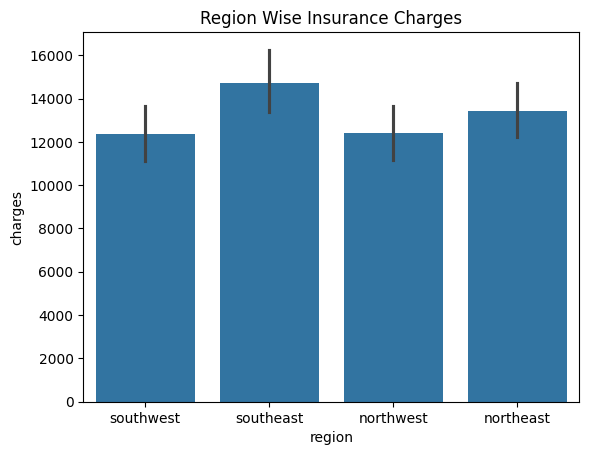

In [ ]:
sns.barplot(x='region',y='charges',data=df)
plt.title('Region Wise Insurance Charges')

This barcharts explains clearly Insurance charges are high in southeast

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [ ]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Cleaning

In [ ]:
le=LabelEncoder()
ins_df['sex']=le.fit_transform(ins_df['sex'])
ins_df['smoker']=le.fit_transform(ins_df['smoker'])

In [ ]:
ins_df['region']=le.fit_transform(ins_df['region'])

In [ ]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
# relationship between features - columns
# numeric columns
ins_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

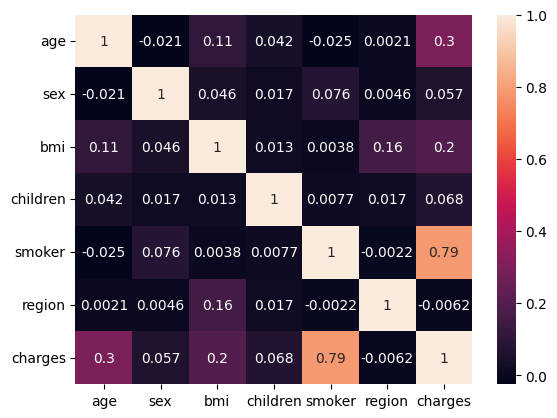

In [ ]:
sns.heatmap(data=ins_df.corr(),annot=True)

Train Test Split

In [ ]:
xtrain,xtest,ytrain,ytest =train_test_split(ins_df.drop('charges',axis=1),ins_df['charges'],test_size=0.2,random_state=42)

In [ ]:
xtrain.shape

(1070, 6)

In [ ]:
xtest.shape

(268, 6)

Gradient Boosting Algorithms

In [ ]:
gbr=GradientBoostingRegressor(loss='squared_error',random_state=42)
gbr.fit(xtrain,ytrain)

GradientBoostingRegressor(random_state=42)

In [ ]:
# make predictions
ypred=gbr.predict(xtest)

In [ ]:
# Evaluate the model
mse=mean_squared_error(ytest,ypred)
print(mse)

18944595.15596614


In [ ]:
mae=mean_absolute_error(ytest,ypred)
print(mae)

2447.9515580545844


In [ ]:
r2 =r2_score(ytest,ypred)
print(r2)

0.8779726251291786
